# Exercise 4.2: Clustering Exercise

Author: Jordan, Andrew

Date: 06/30/2022

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

%pwd

'C:\\Users\\Andrew\\Documents\\Grad School\\DSC 630 - Predictive Analytics\\Assignments'

In [154]:
#Load Data
als = pd.read_csv("data/als_data.csv")
als.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


## 1.Remove any data that is not relevant to the patient’s ALS condition.

In [155]:
#Initial analysis
als.describe(include='all')

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,...,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,1214.874944,54.550157,47.011134,43.952542,40.766347,0.013779,-0.728274,31.692308,27.104926,19.877193,...,136.755061,0.015000,498880.290148,6.203779,4.893387,2.955915,0.007136,6.820450,5.710639,5.183221
std,696.678300,11.396546,3.233980,2.654804,3.193087,0.009567,0.622329,5.314228,6.633643,8.583509,...,2.715247,0.009283,289923.528450,1.747660,2.146076,2.358095,0.004503,0.932141,0.625039,0.437222
min,1.000000,18.000000,37.000000,34.500000,24.000000,0.000000,-4.345238,11.000000,2.500000,0.000000,...,112.000000,0.000000,533.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000
25%,614.500000,47.000000,45.000000,42.000000,39.000000,0.009042,-1.086310,29.000000,23.000000,14.000000,...,135.000000,0.010582,240825.500000,5.000000,3.000000,1.000000,0.003643,6.000000,5.000000,5.000000
50%,1213.000000,55.000000,47.000000,44.000000,41.000000,0.012111,-0.620748,33.000000,28.000000,20.000000,...,137.000000,0.013123,496835.000000,7.000000,5.000000,3.000000,0.006920,7.000000,6.000000,5.000000
75%,1815.500000,63.000000,49.000000,46.000000,43.000000,0.015873,-0.283832,36.000000,32.000000,27.000000,...,138.000000,0.017278,750300.500000,8.000000,6.500000,5.000000,0.009639,7.000000,6.000000,5.000000
max,2424.000000,81.000000,70.300000,51.100000,49.000000,0.243902,1.207011,40.000000,40.000000,40.000000,...,145.000000,0.142857,999482.000000,8.000000,8.000000,8.000000,0.042017,9.000000,9.000000,8.000000


The variables ID and SubjectID appear to be patient identifiers and are not relevant data to the patient's ALS condition.

In [156]:
#Remove ID and SubjectID columns
als = als.drop(['ID','SubjectID'], axis=1)

In [157]:
als.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,...,145.5,143.0,0.017422,8,7.0,7,0.002646,6.0,6.0,6.0
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,...,138.0,136.0,0.010453,8,7.0,5,0.005386,7.0,5.0,5.0
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,...,143.0,140.0,0.008929,5,0.0,0,0.008929,6.0,5.0,5.0
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,...,139.0,138.0,0.012469,5,5.0,3,0.004988,7.0,6.0,5.0
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,...,140.0,138.0,0.008292,6,4.0,1,0.008489,6.0,5.0,5.0


## 2.Apply a standard scaler to the data.

In [158]:
#Create standard scaler
scaler_standard = StandardScaler()
#Apply scaler to data
als_stan = scaler_standard.fit_transform(als)

In [159]:
als_stan

array([[ 0.91713698,  3.08941722, -1.30078105, ..., -0.88037551,
         0.46305355,  1.86853157],
       [-0.57487867, -0.62201561, -1.11240084, ...,  0.1926645 ,
        -1.13720768, -0.41915124],
       [-1.45253494,  0.92441474,  1.14816173, ..., -0.88037551,
        -1.13720768, -0.41915124],
       ...,
       [-0.6626443 , -0.31272954,  0.01788044, ...,  2.33874452,
         0.46305355, -0.41915124],
       [-1.54030057,  0.61512867,  0.01788044, ..., -0.88037551,
        -1.13720768, -0.41915124],
       [-0.57487867,  0.3058426 ,  0.39464087, ..., -1.95341552,
        -1.13720768, -0.41915124]])

### 3.Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.

In [160]:
#Create range of clusters for testing
clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]

In [161]:
#Create lists
als_inertia = []
als_sil_score = []

In [162]:
#Get clusters for 20 in test range
for n in clusters_range:
    als_silK_model = KMeans(n_clusters = n, random_state=42)
    als_silK_model.fit(als_stan)
    als_inertia.append(als_silK_model.inertia_)
    als_sil_score.append(silhouette_score(als_stan, als_silK_model.labels_, metric='euclidean'))

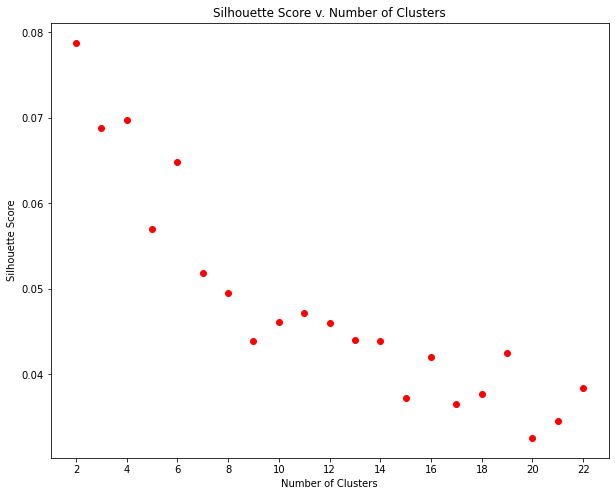

In [163]:
#Create scatter plot of silhouette score v. clusters
plt.figure(figsize=(10,8))
plt.scatter(clusters_range, als_sil_score, color='red')
plt.xticks(np.arange(min(clusters_range), max(clusters_range)+2, 2.0))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score v. Number of Clusters")
plt.show()

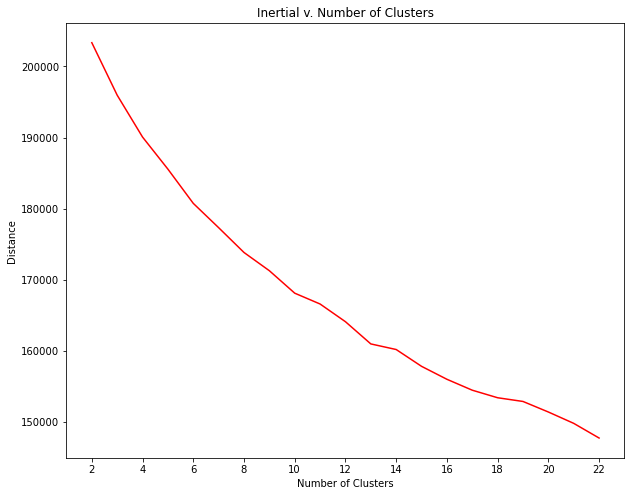

In [164]:
#Create elbow plot of Inertial v clusters
plt.figure(figsize=(10,8))
plt.plot(clusters_range, als_inertia, color='red')
plt.xticks(np.arange(min(clusters_range), max(clusters_range)+2, 2.0))
plt.xlabel("Number of Clusters")
plt.ylabel("Distance")
plt.title("Inertial v. Number of Clusters")
plt.show()

### 4.Use the plot created in (3) to choose an optimal number of clusters for K-means. Justify your choice.

As the highest silhouette score occurs at two clusters,and there appears to be a significant drop-off after four clusters, the optimal number of clusters for K-means is two clusters. 

### 5.Fit a K-means model to the data with the optimal number of clusters chosen in part (4).

In [165]:
#Fit model with two clusters
als_model = KMeans(n_clusters = 2, random_state = 42)
als_model.fit(als_stan)

KMeans(n_clusters=2, random_state=42)

In [166]:
#Get model fit predict
als_model_pred = als_model.fit_predict(als_stan)

### 6.Fit a PCA transformation with two features to the scaled data.

In [167]:
#Import library
from sklearn.decomposition import PCA as PCA

In [168]:
#Create PCA with 2 components
pca = PCA(n_components=2)
als_pca = pca.fit_transform(als_stan)

In [169]:
#Create PCA dataframe
als_pca_df = pd.DataFrame(data=als_pca, columns=['pc1','pc2'])
als_pca_df['label'] = als_model_pred
als_pca_df

,pc1,pc2,label
0,-1.426722,-2.320173,1
1,-1.440237,-4.871454,1
2,1.617860,-0.429434,0
3,-1.920000,2.096014,1
4,0.297695,0.167246,0
...,...,...,...
2218,-4.477569,1.199941,1
2219,-0.398951,-1.877803,1
2220,-0.432912,4.245242,1
2221,-0.330798,3.317534,1


### 7.Make a scatterplot of the PCA transformed data coloring each point by its cluster value.

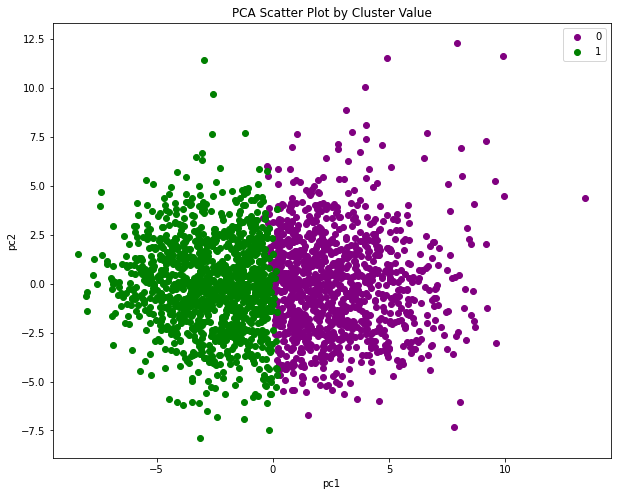

In [170]:
#Create scatterplot
fig, ax = plt.subplots(figsize=(10,8))
als0 = als_pca_df.loc[als_pca_df['label'] == 0]
als1 = als_pca_df.loc[als_pca_df['label'] == 1]
ax.scatter(als0['pc1'],als0['pc2'], color = 'purple', label = '0')
ax.scatter(als1['pc1'],als1['pc2'], color = 'green', label = '1')
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_title('PCA Scatter Plot by Cluster Value')
ax.legend()

### 8.Summarize your results and make a conclusion.

Through the above methods of kmeans clustering and PCA there have been two distinct groups identified in the ALS dataset. The PCA scatter plot by cluster value indicates there are no points of data that are not properly grouped despite some minor overlap occurring in the center of the visualization.